In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [19]:
from sklearn import datasets
digits = datasets.load_digits()
digits.target[42]

1

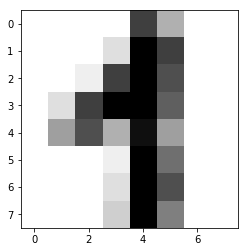

In [20]:
plt.imshow(np.reshape(digits.data[42], (8,8)), cmap='binary')

In [21]:
# https://matplotlib.org/api/_as_gen/matplotlib.colors.Colormap.html
# https://matplotlib.org/users/colormaps.html

In [22]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf.predict(digits.data[-1:])

array([8])

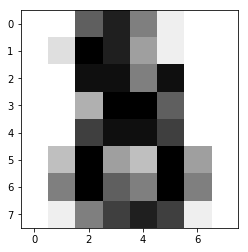

In [24]:
plt.imshow( np.reshape(digits.data[-1:],
                       (8,8)), cmap='binary')

In [25]:
(n_samp, dim, k) = (200, 500, 10)
X = np.random.randn(n_samp, dim)
beta = np.zeros(dim)
inds = np.random.choice(np.arange(dim), size=k, replace=False)
beta[inds] = 5*np.random.randn(k)
y = np.dot(X, beta) + 0.1*np.random.randn(n_samp)

# Split data into train set and test set
X_train, y_train = X[:(n_samp//2)], y[:(n_samp//2)]
X_test, y_test = X[n_samp // 2:], y[n_samp // 2:]

#import and train the model.
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lasso)

0.9803632440829905

In [26]:
np.where( lasso.coef_ !=0 )

(array([ 24, 144, 198, 274, 283, 334, 491]),)

In [27]:
np.where( beta !=0 )

(array([ 24, 144, 198, 213, 244, 274, 283, 288, 334, 491]),)

In [28]:
from sklearn.metrics import f1_score
f1_score(lasso.coef_!=0, beta!=0, average='binary')

0.8235294117647058

Text(0,0.5,'petal ratio')

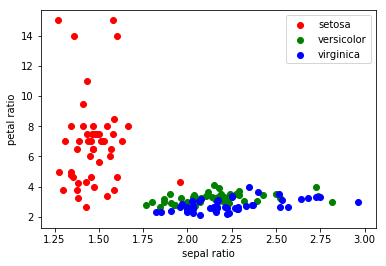

In [29]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
sepal_ratio = X[:,0]/X[:,1]
petal_ratio = X[:,2]/X[:,3]
colors=['red','green','blue']
for i in np.unique(y): #np.uniquw[y] is [0,1,2]
    plt.scatter(sepal_ratio[y==i], petal_ratio[y==i],
                c=colors[i])
plt.legend(('setosa', 'versicolor', 'virginica'))
plt.xlabel('sepal ratio')
plt.ylabel('petal ratio')

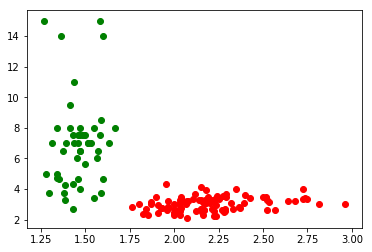

In [30]:
from sklearn import mixture
R = np.stack([sepal_ratio,petal_ratio], axis=1)
gmm = mixture.GaussianMixture(n_components=2, n_init=10,
                              covariance_type='full')
gmm.fit(R)

labs = gmm.predict(R)
for i in np.unique(labs):
    plt.scatter(sepal_ratio[labs==i], petal_ratio[labs==i],
                c=colors[i])

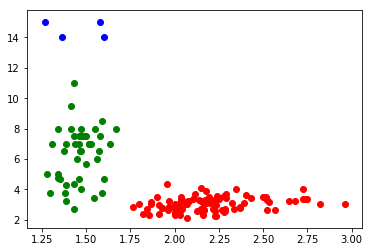

In [31]:
gmm = mixture.GaussianMixture(n_components=3, n_init=10,
                              covariance_type='full')
gmm.fit(R)
labs = gmm.predict(R)
for i in np.unique(labs):
    plt.scatter(sepal_ratio[labs==i], petal_ratio[labs==i],
                c=colors[i])

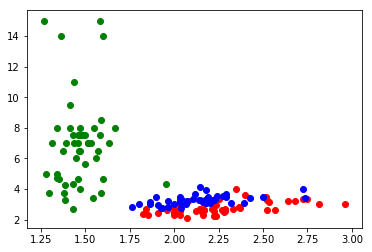

In [32]:
gmm = mixture.GaussianMixture(n_components=3, n_init=10,
                              covariance_type='full')
gmm.fit(X)

labs = gmm.predict(X)
for i in np.unique(labs):
    plt.scatter(sepal_ratio[labs==i], petal_ratio[labs==i],
                c=colors[i])

In [33]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_components_range = range(1, 7)
covar_types = ['spherical', 'tied', 'diag', 'full']
bics = np.zeros(shape=(len(covar_types),len(n_components_range)))
for i in range(len(covar_types)):
    cvtype = covar_types[i]
    for j in range(len(n_components_range)):
        n_comps = n_components_range[j]
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_comps,
                                      covariance_type=cvtype)
        gmm.fit(X)
        bics[i,j] = gmm.bic(X)

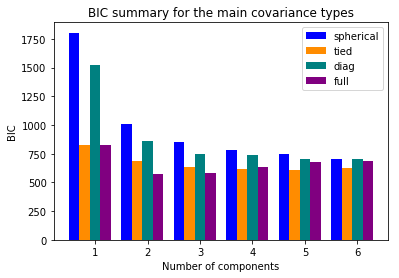

In [34]:
barwidth=0.2
inds = np.array(list(n_components_range))
colors = ['blue', 'darkorange', 'teal', 'purple']
for i in range(len(colors)):
    plt.bar(inds+i*barwidth, bics[i,:], color=colors[i],
           width=barwidth, label=covar_types[i])
plt.xticks(inds + 2*barwidth, n_components_range)
plt.title('BIC summary for the main covariance types')
plt.xlabel('Number of components')
plt.ylabel('BIC')
_ = plt.legend()

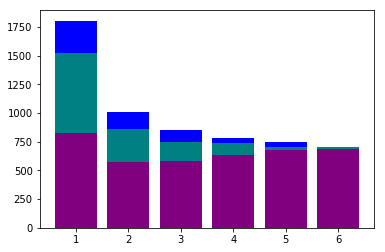

In [35]:
# Make the incorrect bar graph. This is why you need the barwidth business in the previous cell.
for i in range(len(colors)):
    plt.bar(inds, bics[i,:], color=colors[i], label=covar_types[i])

In [38]:
from sklearn.model_selection import cross_val_score
(n_samp, dim, k) = (200, 500, 10)
beta = np.zeros(dim)
inds = np.random.choice(np.arange(dim), size=k, replace=False)
beta[inds] = 5*np.random.randn(k)
X = np.random.randn(n_samp, dim)
y = np.dot(X, beta) + 0.1*np.random.randn(n_samp)

lasso = Lasso(alpha=5)
scores = cross_val_score(lasso, X, y, cv=10)
scores

array([0.48286732, 0.31126123, 0.21513214, 0.40061088, 0.40758368,
       0.38318857, 0.25855801, 0.30367255, 0.52062931, 0.41335016])

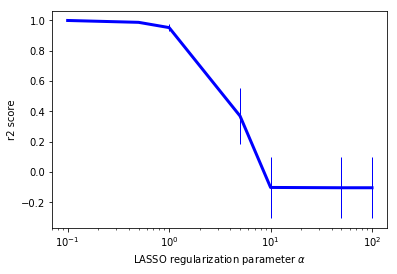

In [40]:
alphavals = np.array([0.1, 0.5, 1.0, 5, 10.0, 50, 100])
mean_scores = np.zeros(alphavals.shape)
sd_scores = np.zeros(alphavals.shape)

for i in range(len(alphavals)):
    lasso = Lasso(alpha=alphavals[i])
    scores = cross_val_score(lasso, X, y, cv=10)
    mean_scores[i] = np.mean(scores)
    sd_scores[i] = np.std(scores)
    
plt.errorbar(alphavals, mean_scores, yerr=2*sd_scores,
             color='blue', linewidth=3, elinewidth=1)
plt.xscale('log'); plt.ylabel('r2 score')
_=plt.xlabel(r'LASSO regularization parameter $\alpha$')

In [41]:
colors=['red','green','blue'] # correct the color list.

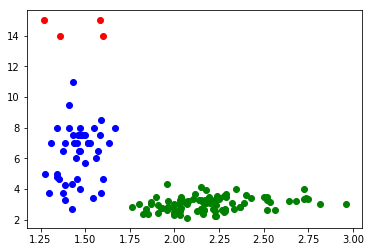

In [42]:
gmm = mixture.GaussianMixture(n_components=3, n_init=10,
                              covariance_type='full')
gmm.fit(R)
labs = gmm.predict(R)
for i in np.unique(labs):
    plt.scatter(sepal_ratio[labs==i], petal_ratio[labs==i],
                c=colors[i])

In [46]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labs, iris.target)

0.5075234747132037

In [47]:
beta = np.zeros(dim)
inds = np.random.choice(np.arange(dim), size=k, replace=False)
beta[inds] = 5*np.random.randn(k)
(n_samp, dim, k) = (200, 500, 10)
X = np.random.randn(n_samp, dim)
y = np.dot(X, beta) + 0.1*np.random.randn(n_samp)

lasso = Lasso(alpha=1)
lasso.fit(X, y)

import pickle
s = pickle.dumps(lasso)
xtest = np.random.randn(1,dim)
ytest = np.dot(xtest,beta) + 0.1*np.random.randn(1)
lasso2 = pickle.loads(s)
lasso.predict(xtest), lasso2.predict(xtest)

(array([2.45867461]), array([2.45867461]))